# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

## Project Overview

This project analyzes the global impact of COVID-19 using confirmed cases and deaths data, and examines how pandemic outcomes relate to country-level happiness indicators.

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [5]:
df = pd.read_csv("data\\covid19_Confirmed_dataset.csv")

In [6]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

In [7]:
df.drop(["Lat", "Long"], axis=1, inplace=True)
df.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [8]:
df_aggregated = df.groupby("Country/Region").sum()
df_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
df_aggregated.drop(["Province/State"], axis=1, inplace=True)

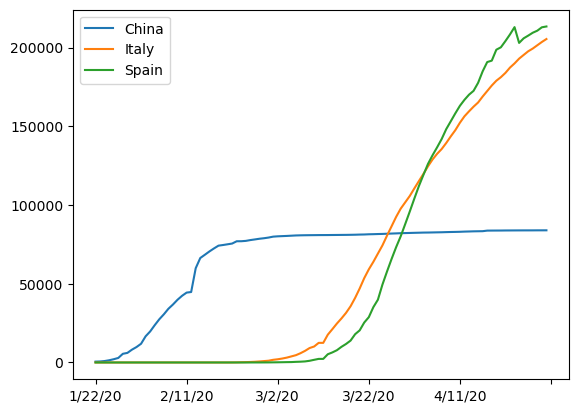

In [10]:
df_aggregated.loc["China"].plot()
df_aggregated.loc["Italy"].plot()
df_aggregated.loc["Spain"].plot()
plt.legend()

<Axes: >

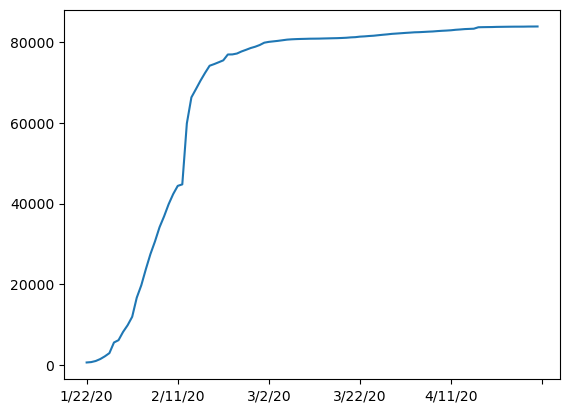

In [11]:
df_aggregated.loc['China'].plot()

We will use the first derivative to calculate the infection rate for the Countries. 

<Axes: >

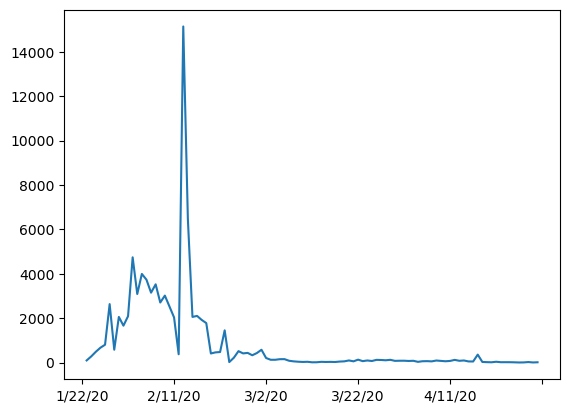

In [12]:
df_aggregated.loc["China"].diff().plot()

In [13]:
df_aggregated.loc["China"].diff().max()

# In one day 15136 new infected have been recorded. 

15136.0

The following loop is aimed at adding to the dataframe a new column containing the infection rate for each Country.

In [14]:
countries = list(df_aggregated.index)
max_infection_rates = []

for c in countries: 
    max_infection_rates.append(df_aggregated.loc[c].diff().max())

df_aggregated["max_infection_rate"] = max_infection_rates

Now, we create a new dataframe containing only the maximum infection rate for each Country. 

In [15]:
corona_data = pd.DataFrame(df_aggregated["max_infection_rate"])

In [16]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


To further proceed in our analysis, we will take the world happiness report dataset, to extract useful information like the GDP per capita of each Country, and we will discover the relationship between this variable and the infection and death rate of each Country. 

In [17]:
happiness_df = pd.read_csv("data\\worldwide_happiness_report.csv")
happiness_df.head(15)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [18]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [19]:
happiness_df.drop(useless_cols, axis=1, inplace=True)
happiness_df.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [20]:
happiness_df.set_index("Country or region", inplace=True)
happiness_df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [21]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [22]:
data = corona_data.join(happiness_df, how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [23]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


From the correlation matrix, Healthy life expectancy shows the strongest correlation with the maximum infection rate. This suggests that countries with higher healthy life expectancy also tend to report higher infection rates. However, this relationship is correlational rather than causal and is likely influenced by confounding factors such as testing capacity, healthcare infrastructure, data reporting quality, and population mobility.

<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

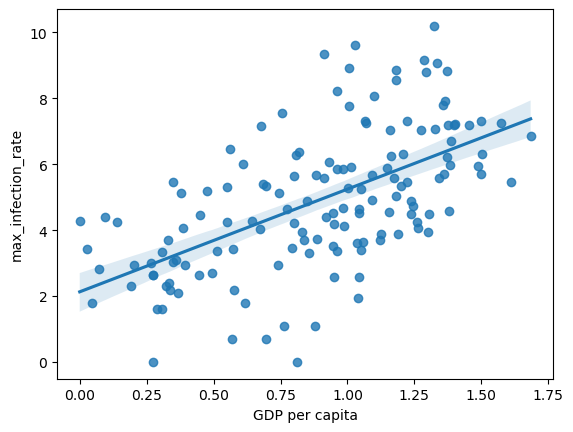

In [24]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.regplot(x=x,y=np.log(y))

It seems that Countries with a lower GDP per capita have a lower maximum infection rate, and this could be due to the lack of COVID tests to confirm the infection. We will prove that this is not the case by analysing the deaths' dataset. 

#### COVID19 Death Dataset Analysis

The objective is to derive maximum deaths per country and correlate that with GDP per capita.

In [25]:
df = pd.read_csv("data\\covid19_deaths_dataset.csv")
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,147,152,165,176,185,192,197,207,214,218
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,24,24,24,27,28,28,29,30,30,32
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,26,26,31,33,33,34,34,39,40,41


In [26]:
death_data = df.groupby("Country/Region").sum()
death_data.drop(["Province/State", "Lat", "Long"], axis=1, inplace=True)

In [27]:
countries = list(death_data.index)
max_death_rate = []

for c in countries: 
    max_death_rate.append(death_data.loc[c].diff().max())

death_data["max_death_rate"] = max_death_rate

death_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [28]:
death_data = pd.DataFrame(death_data["max_death_rate"])

In [29]:
data2 = death_data.join(happiness_df, how="inner")
data2.head(10)

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283
Australia,8.0,1.372,1.548,1.036,0.557
Austria,30.0,1.376,1.475,1.016,0.532
Azerbaijan,3.0,1.043,1.147,0.769,0.351
Bahrain,1.0,1.362,1.368,0.871,0.536
Bangladesh,15.0,0.562,0.928,0.723,0.527


In [30]:
data2.corr()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


In [31]:
(data2["max_death_rate"] == 0).sum()

np.int64(15)

<Axes: xlabel='GDP per capita', ylabel='max_death_rate'>

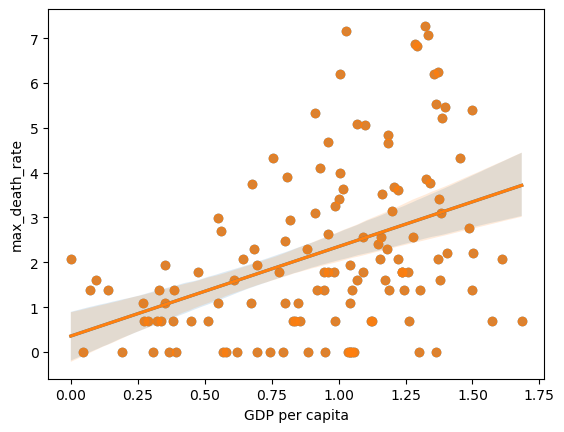

In [32]:
x=data2["GDP per capita"]
y = data2["max_death_rate"].replace(0, np.nan)
sns.regplot(x=data2["GDP per capita"], y=np.log(y))
sns.regplot(x=x, y=np.log(y), data=data2)

As we can see from the plot, low-GDP Countries have lower death rates, so the lower infection rate is not only to be explained by the lack of testing kits. Think of a low-GDP Country which has many infections, but lacks the capability of testing his population. The Country would have registered a high number of deaths, so the infection rate would be low because of the scarcity of tests, but the death rate would remain high; but as resulting from our analysis, this is not the case, as both the death rate and the infection rate are positively correlated with GDP per capita. In conclusion, testing limitations may contribute to lower reported infections, but they are unlikely to be the only explanation, because death rates show a similar pattern.